Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Giovanni Tokarski, 2010826"
COLLABORATORS = ""

---

In [2]:
Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

SyntaxError: invalid syntax (<ipython-input-2-5e2dc15a036d>, line 1)

# Assignment 4

This is the assignment for week 4. This was actually an exam in a previous year. We give the points to give you an idea of how such an exam works. However, we grade assignments only as pass or fail.

# Doing math with python

Here we use python to solve equations `scipy`'s function `fsolve`.

# Import libraries

First, we need to import some libraries:

In [1]:
from scipy import optimize
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

We are going to analyze the function $x^2 - 8x +15$.

-   **1. [0.5 point]:** Define the python function `objective` as $x^2 - 8x +15$.

In [2]:
def objective(x):
    return x**2-8*x+15

We want to know what the zeros/roots are of this function; that is, the points $x$ where the function equals 0 (or, crosses the $x$-axis).

-   **2. [1 point]:** Use `fsolve` from `scipy.optimize` to find **both** roots of this functions.

In [3]:
optimize.fsolve(objective,[2,6])


array([3., 5.])

-   **3. [0.5 point]:** Find the points of intersection between the function `objective` above and the function $f(x)=1.5 x$.

In [4]:
def f(x):
    return 1.5*x
def intersection(x):
    x = x**2-8*x+15-1.5*x
    return x
optimize.fsolve(intersection,[0,10])

array([2. , 7.5])

We want to plot the function and hence need to define a range over which to plot. Define the range in such a way that the graph below looks "nice".

-   **4. [0.5 point]:** Generate a list (or "vector", if you wish) of $x$ values between 0 and 8 (including 8.0). Call this `range_x`.

In [5]:
range_x = arange(0,8.1,0.1)

# Using `matplotlib`

-   **5. [0.5 point]:** Above we import `matplotlib.pyplot`. Explain what the `plt`-part of this import does.

the plt part is needed to represent graphically the function

-   **6. [1 point]:** Use `matplotlib` to plot both the function `objective` and the function $1.5 x$. Make sure that the horizontal axis is labeled $x$ and the vertical axis $y$.

Text(0,0.5,'y')

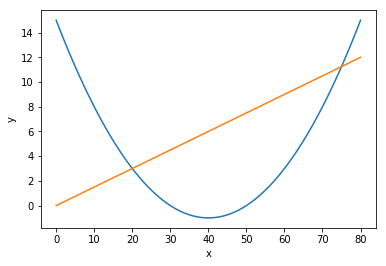

In [6]:
plt.plot([objective(x) for x in range_x])
plt.plot([f(x) for x in range_x])
plt.xlabel('x')
plt.ylabel('y') 